<a href="https://colab.research.google.com/github/suzannastep/compbio-tutorial/blob/master/S3F/GeneticCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries we need to use code from
import pandas as pd
import numpy as np
import requests
from itertools import zip_longest
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', None)

In [ ]:
#Read a file that contains the codon translation table and create a Data Frame
master = "https://raw.githubusercontent.com/suzannastep/compbio-tutorial/master/S3F/CodonTable.txt"
codon_table = requests.get(master)
codon_table = codon_table.text
codon_table = np.array([[st.split('\t')][0][:4] for st in codon_table.split("\n")][2:-1])
codon_table = pd.DataFrame(codon_table[:,:-4:-1],index=codon_table[:,0],columns=["Amino Acid","1 Letter Code","3 Letter Code"])

In [ ]:
#decide how different codons will be different colors
needed_codons = ['D', 'E', 'G', 'I', 'M', 'N', 'V', 'Y']
other_codons = [c for c in codon_table["1 Letter Code"].unique() if c not in needed_codons]
all_codons = needed_codons + other_codons
# TODO fill in the bead colors
colors = ["white","orange","green","yellow","purple","pink","light blue","dark blue","black","cream"]
colormap = {}
for color,codon in zip_longest(colors,all_codons,fillvalue=""):
  colormap[codon] = color.title()
codon_table["Bead Color"] = [colormap[codon] for codon in codon_table["1 Letter Code"]]

In [ ]:
#admire our beautiful table of codons!
codon_table

,Amino Acid,1 Letter Code,3 Letter Code,Bead Color
AAA,Lysine,K,Lys,Black
AAC,Asparagine,N,Asn,Pink
AAG,Lysine,K,Lys,Black
AAT,Asparagine,N,Asn,Pink
ACA,Threonine,T,Thr,Cream
ACC,Threonine,T,Thr,Cream
ACG,Threonine,T,Thr,Cream
ACT,Threonine,T,Thr,Cream
AGA,Arginine,R,Arg,
AGC,Serine,S,Ser,


In [ ]:
def translate_sequence(sequence,verbose=False,make_bracelet=True):
  """
  Given a DNA sequence, translates it into a sequence of amino acids,
  as represented by their 1 letter codes.

  Inputs: 
    sequence
      A string of DNA
    verbose
      Either `True` or `False`. If true, the function prints out extra 
      information as it goes along. 
    make_bracelet
      Either `True` or `False`. If true, the function will make 
      a picture of the bracelet.
  
  Output: 
  """
  #Decide how many codons are in the sequence
  how_many_codons = len(sequence)//3
  #Print out a report if we're asked to
  if verbose:
    print("How many codons are there?",how_many_codons)
  #initialize an empty picture for the bracelet
  if make_bracelet:
    fig, ax = plt.subplots(figsize=(15,1)) 
  #initialize an empty chain of amino acids
  amino_acid_chain= []
  #For each codon in the sequence...
  for codon_number in range(how_many_codons):
    #pick out the codon from the sequence
    codon = sequence[3*codon_number:3*codon_number+3]
    #get the 1 letter code and bead color
    amino_acid = codon_table.loc[codon.upper(),"1 Letter Code"]
    amino_acid_color = codon_table.loc[codon.upper(),"Bead Color"]
    #add the amino acid to the chain
    amino_acid_chain.append(amino_acid)
    #Print out a report
    if verbose:
        print("\nCodon Number:\t",codon_number+1)
        print("Codon:\t\t",codon.upper())
        print("Amino Acid:\t",codon_table.loc[codon.upper(),"Amino Acid"])
        print("1 Letter Code:\t",amino_acid)
        print("Bead Color:\t",amino_acid_color)
    #Draw a bead on our picture
    if make_bracelet:
      #tell the computer all the details about the circle we want to draw
      bead = plt.Circle((codon_number, 0),#x,y position of center of circle
                        0.5, #radius
                        facecolor=amino_acid_color.lower().replace(" ",""),#color
                        edgecolor="black",#black line around it
                        alpha=0.7)#make the circle a little transparent
      ax.add_patch(bead) #actually draw the circle
      ax.text(codon_number,0,#x,y position of the text
              amino_acid,#variable containing the text
              fontsize=20,#size of the text 
              color="black",#color of the text 
              horizontalalignment='center',#center the text horizontally
              verticalalignment='center')#center the text vertically
  #show the bracelet
  if make_bracelet:
    plt.axis("equal")
    plt.axis("off")
    plt.show()
  return "".join(amino_acid_chain)

In [ ]:
sequence = "gaaaacatggagaacgatgaaaatattgtgtatggt"

How many codons are there? 12

Codon Number:	 1
Codon:		 GAA
Amino Acid:	 Glutamic_acid
1 Letter Code:	 E
Bead Color:	 Orange

Codon Number:	 2
Codon:		 AAC
Amino Acid:	 Asparagine
1 Letter Code:	 N
Bead Color:	 Pink

Codon Number:	 3
Codon:		 ATG
Amino Acid:	 Methionine
1 Letter Code:	 M
Bead Color:	 Purple

Codon Number:	 4
Codon:		 GAG
Amino Acid:	 Glutamic_acid
1 Letter Code:	 E
Bead Color:	 Orange

Codon Number:	 5
Codon:		 AAC
Amino Acid:	 Asparagine
1 Letter Code:	 N
Bead Color:	 Pink

Codon Number:	 6
Codon:		 GAT
Amino Acid:	 Aspartic_acid
1 Letter Code:	 D
Bead Color:	 White

Codon Number:	 7
Codon:		 GAA
Amino Acid:	 Glutamic_acid
1 Letter Code:	 E
Bead Color:	 Orange

Codon Number:	 8
Codon:		 AAT
Amino Acid:	 Asparagine
1 Letter Code:	 N
Bead Color:	 Pink

Codon Number:	 9
Codon:		 ATT
Amino Acid:	 Isoleucine
1 Letter Code:	 I
Bead Color:	 Yellow

Codon Number:	 10
Codon:		 GTG
Amino Acid:	 Valine
1 Letter Code:	 V
Bead Color:	 Light Blue

Codon Number:	 11
Codon:		 TAT
Am

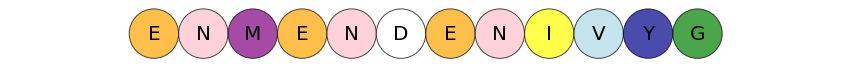

In [ ]:
amino_acid_chain = translate_sequence(sequence,verbose=True,make_bracelet=True)

In [ ]:
amino_acid_chain

'ENMENDENIVYG'